In [ ]:
#!pip install tensorflow

In [82]:
#!pip3 install ann_visualizer
#!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
# Neural Networks Classification
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
df=pd.read_csv('forestfires.csv')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [86]:
df.head(20)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


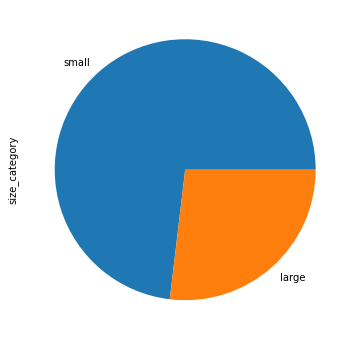

In [87]:
plt.figure(figsize=(10,6))
df["size_category"].value_counts().plot(kind="pie")

In [88]:
df['size_category']= df['size_category'].astype('category') # will convert column to category
df['size_category']= df['size_category'].cat.codes # Encoding the column

df['month']= df['month'].astype('category') # will convert column to category
df['month']= df['month'].cat.codes # Encoding the column


df['day']= df['day'].astype('category') # will convert column to category
df['day']= df['day'].cat.codes # Encoding the column

In [42]:
df[df.duplicated()]# Prints the duplicated rows

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,1,6,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
100,1,3,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1
215,7,2,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,0
303,6,0,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,1
426,1,4,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,1
461,1,2,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
501,1,5,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,1
508,1,0,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
df_cleaned=df.drop_duplicates() # to drop the duplicate rows

In [90]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    int8   
 1   day            509 non-null    int8   
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [91]:
for i in df_cleaned.columns[11:30]:
    data_cleaned = df_cleaned.drop(i, axis=1, inplace=True)

In [92]:
df_cleaned.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [93]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    int8   
 1   day            509 non-null    int8   
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    int8   
dtypes: float64(8), int64(1), int8(3)
memory usage: 41.3 KB


In [94]:
 #shift column 'RH' to first position
first_column = df_cleaned.pop('RH')

In [95]:
# insert column using insert(position,column_name,
# first_column) function
df_cleaned.insert(0, 'RH', first_column)

In [96]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RH             509 non-null    int64  
 1   month          509 non-null    int8   
 2   day            509 non-null    int8   
 3   FFMC           509 non-null    float64
 4   DMC            509 non-null    float64
 5   DC             509 non-null    float64
 6   ISI            509 non-null    float64
 7   temp           509 non-null    float64
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    int8   
dtypes: float64(8), int64(1), int8(3)
memory usage: 41.3 KB


In [97]:
# Reducing the memory size
for i in df_cleaned.columns[3:11]:
    df_cleaned[i]=df_cleaned[i].astype('float16')

In [98]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RH             509 non-null    int64  
 1   month          509 non-null    int8   
 2   day            509 non-null    int8   
 3   FFMC           509 non-null    float16
 4   DMC            509 non-null    float16
 5   DC             509 non-null    float16
 6   ISI            509 non-null    float16
 7   temp           509 non-null    float16
 8   wind           509 non-null    float16
 9   rain           509 non-null    float16
 10  area           509 non-null    float16
 11  size_category  509 non-null    int8   
dtypes: float16(8), int64(1), int8(3)
memory usage: 17.4 KB


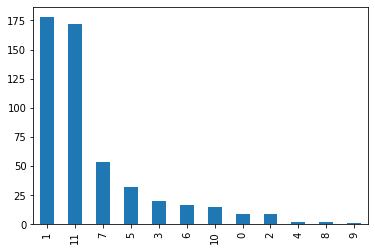

In [99]:
df_cleaned.month.value_counts().plot(kind="bar")

In [100]:
df_cleaned.size_category.value_counts()

1    371
0    138
Name: size_category, dtype: int64

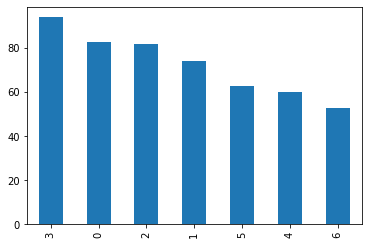

In [101]:
df_cleaned.day.value_counts().plot(kind="bar")

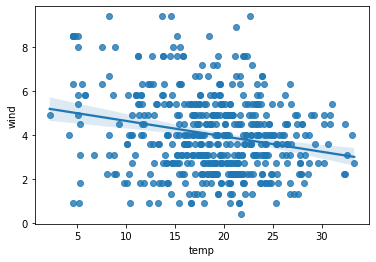

In [102]:
sns.regplot(x='temp',y='wind',data=df_cleaned);

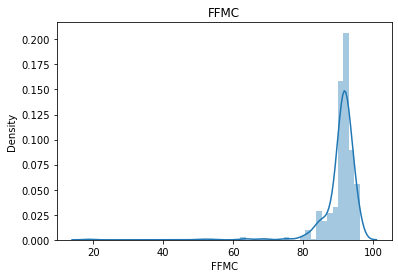

In [103]:
sns.distplot(df_cleaned.FFMC)
plt.title("FFMC");

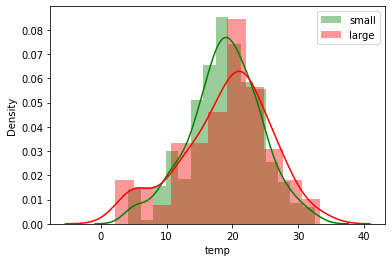

In [104]:
sns.distplot(df_cleaned[df_cleaned['size_category']==1] 
             ['temp'],
             color='g',
             label='small')

sns.distplot(df_cleaned[df_cleaned['size_category']==0] 
             ['temp'],
             color='r',
             label='large');
plt.legend()

In [105]:
names= 'month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','size_category'
array = df_cleaned.values
X = array[:,0:11]
Y = array[:,11]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3,random_state=15)

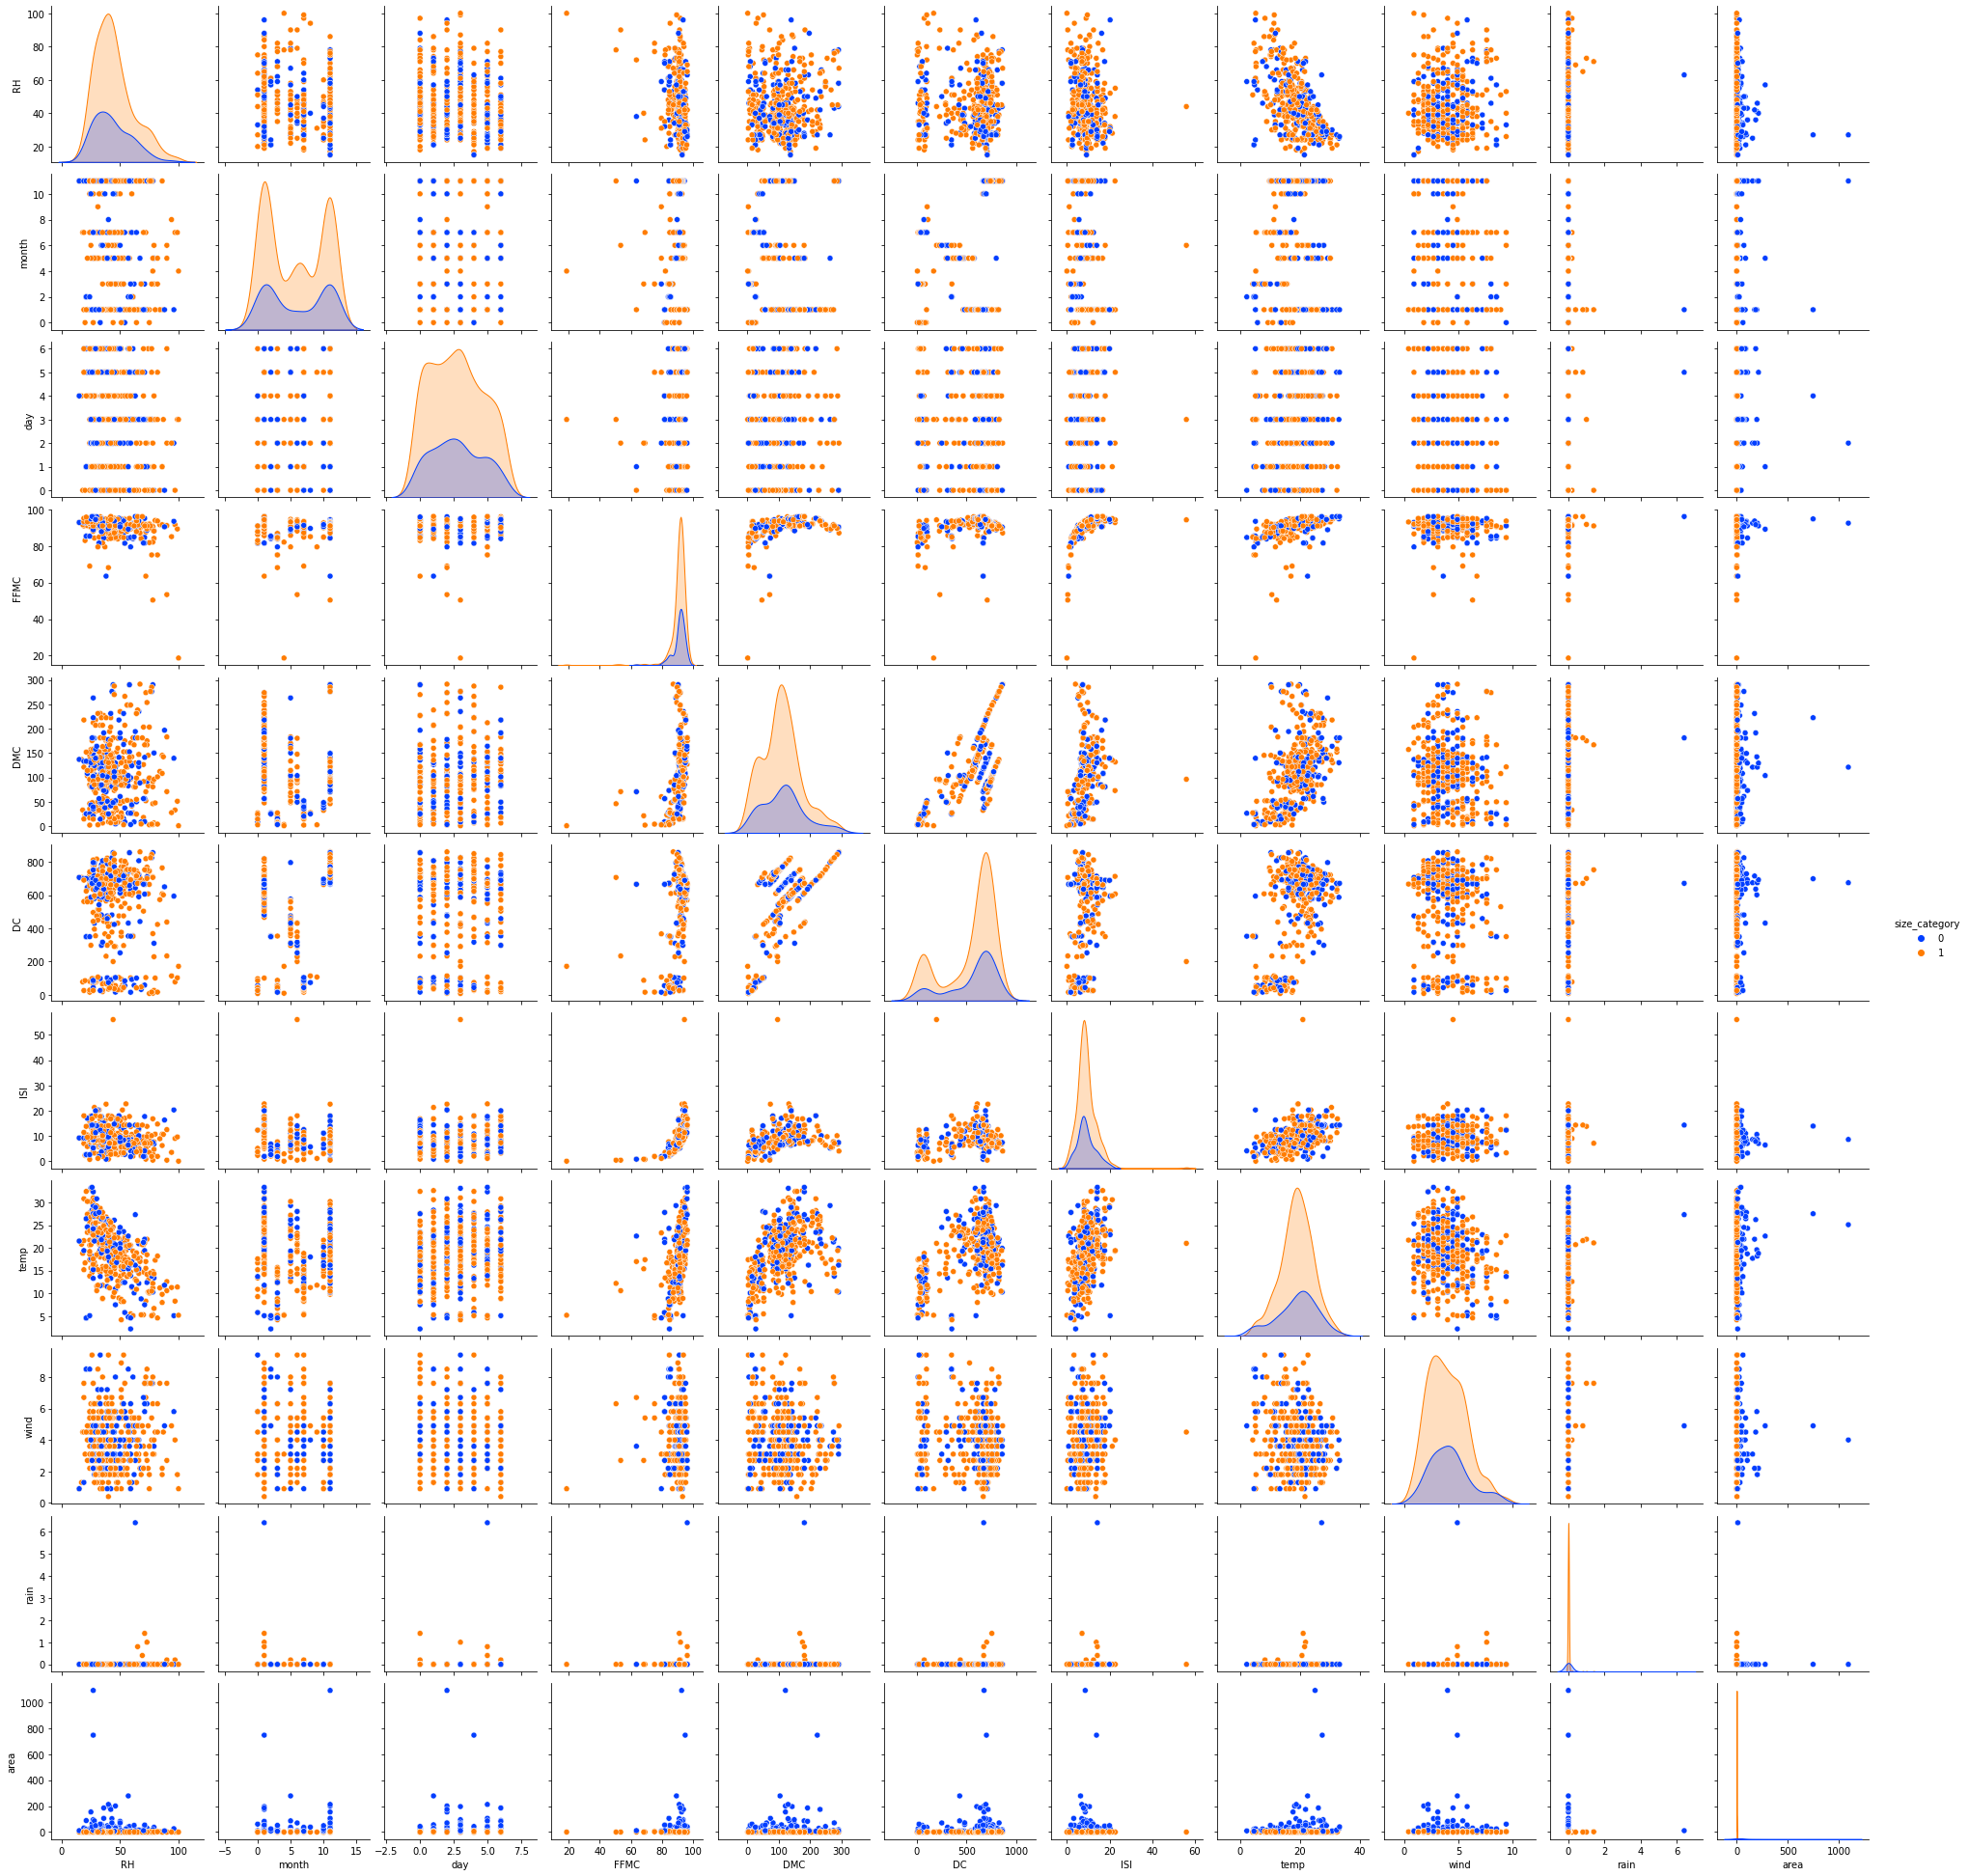

In [107]:

X = array[:,0:11]
Y = array[:,11]
sns.pairplot(df_cleaned, hue="size_category",palette="bright")

In [108]:
## Feature Extraction with RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [109]:
# Feature Extraction
model=LogisticRegression(max_iter=300)
rfe=RFE (model)
fit= rfe.fit(X,Y)

In [110]:
# Selected features
features=fit.support_
features

array([False,  True, False,  True, False, False,  True, False,  True,
       False,  True])

In [111]:
influencial_features=['area','DC','DMC','rain']

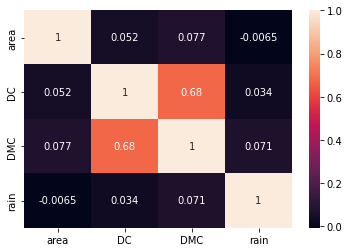

In [112]:
sns.heatmap(df_cleaned[influencial_features].corr(),annot=True);

In [113]:
from sklearn.preprocessing import StandardScaler 

In [114]:
# Standardization
a = StandardScaler()
a.fit(X)

X_standardized = a.transform(X) 


In [115]:
pd.DataFrame(X_standardized).describe() 

,0,1,2,3,4,5,6,7,8,9,10
count,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02
mean,1.465756e-16,1.395958e-16,-8.375749e-17,1.074888e-15,-2.791916e-17,2.791916e-17,3.315401e-17,2.861714e-16,7.503275e-17,-1.395958e-17,-2.093937e-17
std,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00
min,-1.789299e+00,-1.329184e+00,-1.424495e+00,-1.295804e+01,-1.712197e+00,-2.177395e+00,-1.970106e+00,-2.856025e+00,-2.006971e+00,-6.903932e-02,-2.027720e-01
25%,-7.494866e-01,-1.100464e+00,-9.039866e-01,-7.786154e-02,-7.518316e-01,-4.437663e-01,-5.731739e-01,-5.941264e-01,-7.290511e-01,-6.903932e-02,-2.027720e-01
50%,-1.378325e-01,4.313783e-02,1.370296e-01,1.811496e-01,-3.014009e-02,4.687194e-01,-1.365261e-01,7.393373e-02,-6.099347e-03,-6.903932e-02,-1.932549e-01
75%,5.349871e-01,1.186740e+00,6.575378e-01,4.063767e-01,4.866146e-01,6.703737e-01,4.314571e-01,6.737152e-01,4.932367e-01,-6.903932e-02,-1.001183e-01
max,3.409762e+00,1.186740e+00,1.698554e+00,1.003229e+00,2.839956e+00,1.261221e+00,1.027650e+01,2.475737e+00,2.994259e+00,2.155417e+01,1.682263e+01


In [116]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [117]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=11, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(11, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [78]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   1.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.912 total time=   1.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.931 total time=   1.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.941 total time=   1.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.921 total time=   1.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [68]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9684915542602539, using {'batch_size': 40, 'epochs': 50}
0.9527858614921569,0.03260800969200001 with: {'batch_size': 10, 'epochs': 10}
0.9507862448692321,0.028750035392171098 with: {'batch_size': 10, 'epochs': 50}
0.958707046508789,0.02667555630375505 with: {'batch_size': 10, 'epochs': 100}
0.9547854781150817,0.03598696999065228 with: {'batch_size': 20, 'epochs': 10}
0.944884467124939,0.03407077061545142 with: {'batch_size': 20, 'epochs': 50}
0.9527858614921569,0.030157832182054232 with: {'batch_size': 20, 'epochs': 100}
0.8742185950279235,0.06952785808004655 with: {'batch_size': 40, 'epochs': 10}
0.9684915542602539,0.027496659685990202 with: {'batch_size': 40, 'epochs': 50}
0.966511356830597,0.030355359741330426 with: {'batch_size': 40, 'epochs': 100}


In [71]:
# fit the keras model on the dataset
history = model.fit(X, Y, epochs=50,validation_split=0.33, batch_size=40)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


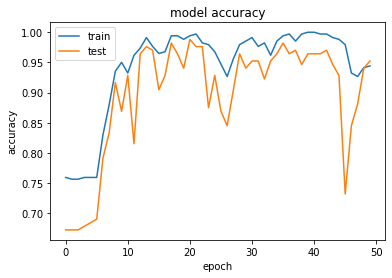

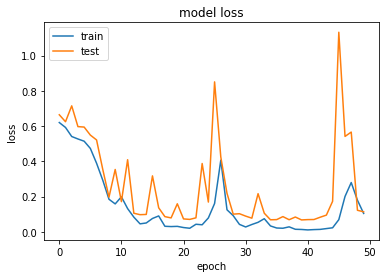

In [72]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## From the above analysis we can say that the small area of the forest is burned more as compared to the large area and the model is  able to predict, if burned area is large or small with 96% accuracy.